In [1]:
import os
os.chdir('../py')

import pandas as pd
import numpy as np
import feather

from glob import glob

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["patch.force_edgecolor"] = False
plt.rcParams['font.family'] = 'Ricty Diminised'
sns.set(style="whitegrid", font='Ricty Diminised', palette="muted", color_codes=True, rc={'grid.linestyle': '--'})
red = sns.xkcd_rgb["light red"]
green = sns.xkcd_rgb["medium green"]
blue = sns.xkcd_rgb["denim blue"]

import japanize_matplotlib

from sklearn.cluster import KMeans
from sklearn.model_selection import KFold, StratifiedKFold, GroupKFold
from sklearn.preprocessing import LabelEncoder

# my modules
import EDA
import utils

In [2]:
DIR = '../input/feather/'

train = feather.read_dataframe(DIR + 'train.ftr')
test  = feather.read_dataframe(DIR + 'test.ftr')

In [83]:
not_count_cols = ['card1', 'id_02']

addr_cols = ['addr1', 'addr2']
id_cols   = [col for col in train.columns if 'id_' in col]
card_cols = [col for col in train.columns if 'card_' in col]
add_count_cols = addr_cols + id_cols + card_cols

count_cols = list(train.columns[train.dtypes == 'object']) + add_count_cols
count_cols = sorted([col for col in set(count_cols) if not col in not_count_cols])

Index(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1',
       'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'id_12', 'id_15',
       'id_16', 'id_23', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_33',
       'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType',
       'DeviceInfo'],
      dtype='object')

In [96]:
sorted(count_cols)

['DeviceInfo',
 'DeviceType',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9',
 'P_emaildomain',
 'ProductCD',
 'R_emaildomain',
 'addr1',
 'addr2',
 'card4',
 'card6',
 'id_01',
 'id_03',
 'id_04',
 'id_05',
 'id_06',
 'id_07',
 'id_08',
 'id_09',
 'id_10',
 'id_11',
 'id_12',
 'id_13',
 'id_14',
 'id_15',
 'id_16',
 'id_17',
 'id_18',
 'id_19',
 'id_20',
 'id_21',
 'id_22',
 'id_23',
 'id_24',
 'id_25',
 'id_26',
 'id_27',
 'id_28',
 'id_29',
 'id_30',
 'id_31',
 'id_32',
 'id_33',
 'id_34',
 'id_35',
 'id_36',
 'id_37',
 'id_38']

In [90]:
add_count_cols

['addr1',
 'addr2',
 'id_01',
 'id_02',
 'id_03',
 'id_04',
 'id_05',
 'id_06',
 'id_07',
 'id_08',
 'id_09',
 'id_10',
 'id_11',
 'id_12',
 'id_13',
 'id_14',
 'id_15',
 'id_16',
 'id_17',
 'id_18',
 'id_19',
 'id_20',
 'id_21',
 'id_22',
 'id_23',
 'id_24',
 'id_25',
 'id_26',
 'id_27',
 'id_28',
 'id_29',
 'id_30',
 'id_31',
 'id_32',
 'id_33',
 'id_34',
 'id_35',
 'id_36',
 'id_37',
 'id_38']

In [ ]:
def count_encoding(train, test, columns):
    for c in columns:
        vc = pd.concat([train[c], test[c]]).value_counts()
        train[f'{PREF}__{c}_CE'] = train[c].map(vc)
        test[f'{PREF}__{c}_CE'] = test[c].map(vc)
        
    return train, test

In [8]:
pd.concat([train['ProductCD'], test['ProductCD']]).value_counts()

W    800657
C    137785
R     73346
H     62397
S     23046
Name: ProductCD, dtype: int64

In [13]:
col = [col for col in train.columns if 'id_' in col]

id_01


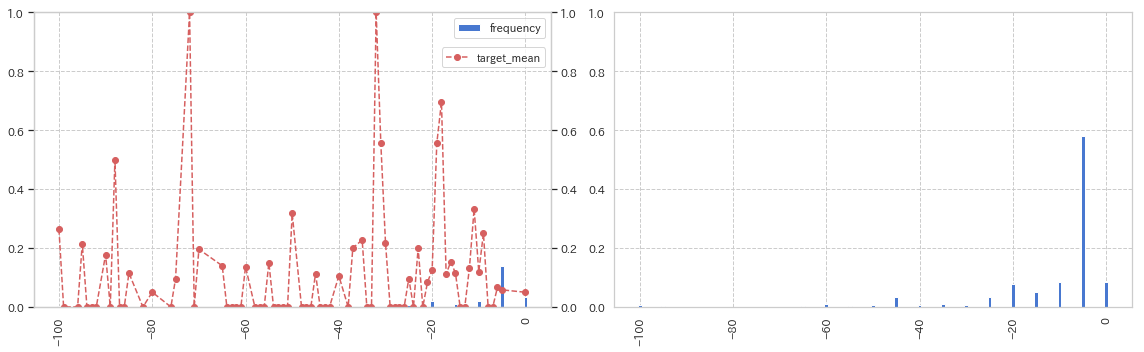

id_03


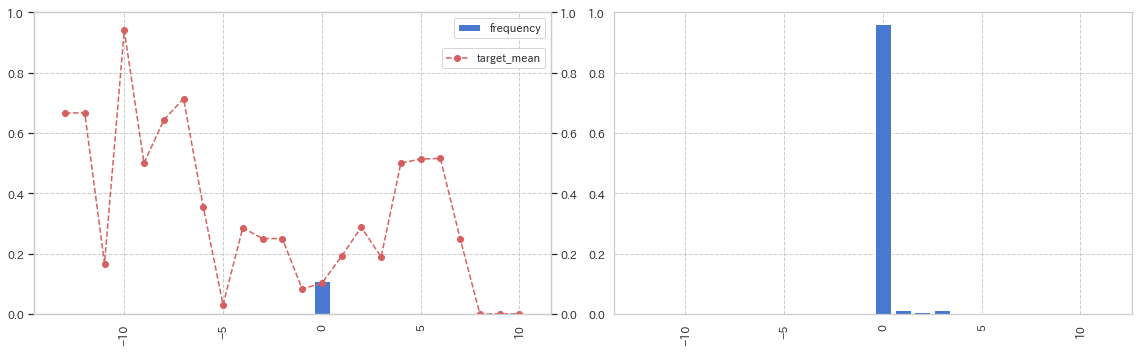

id_04


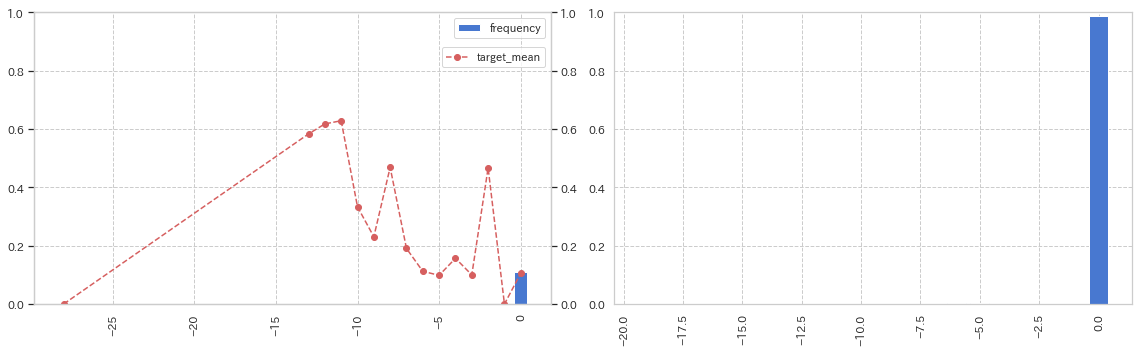

id_05


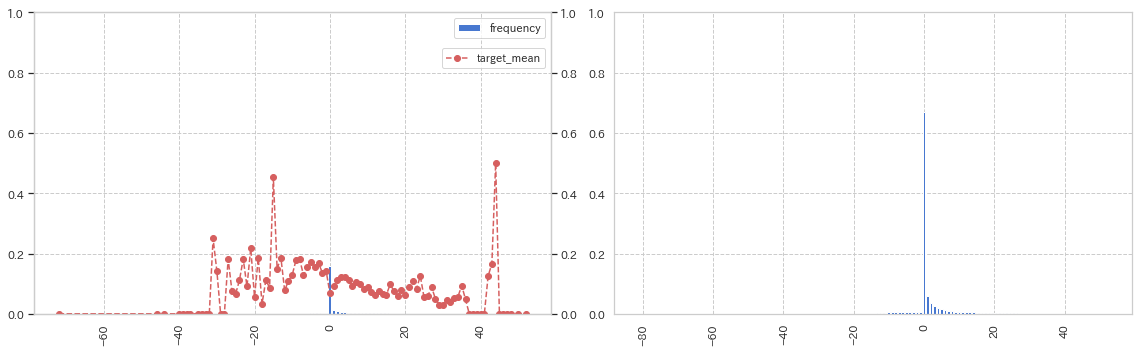

id_06


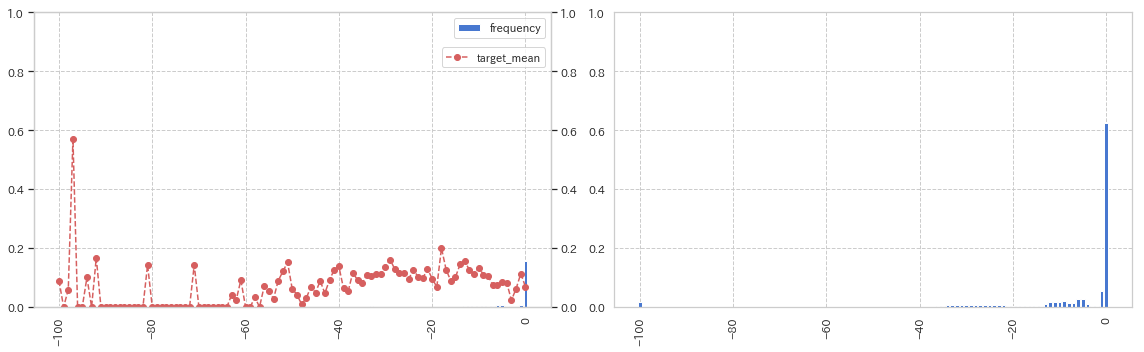

id_07


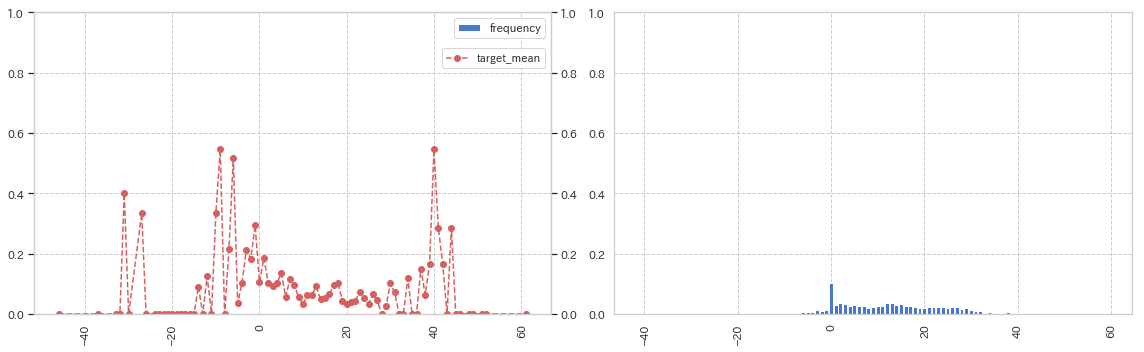

id_08


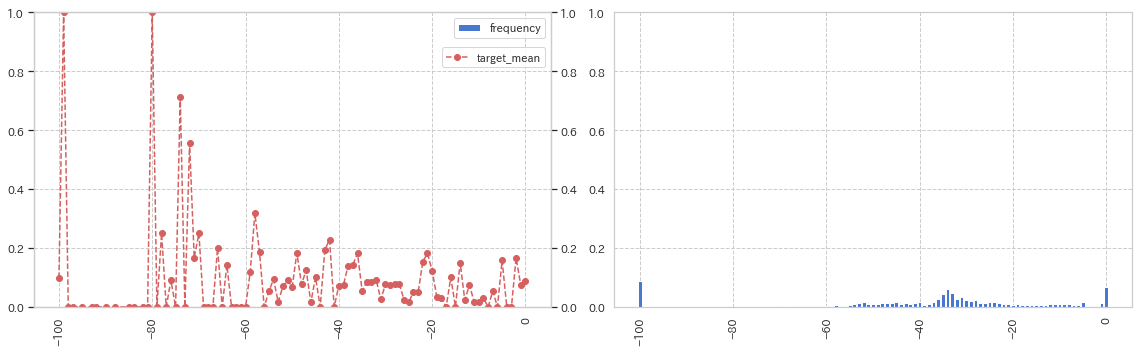

id_09


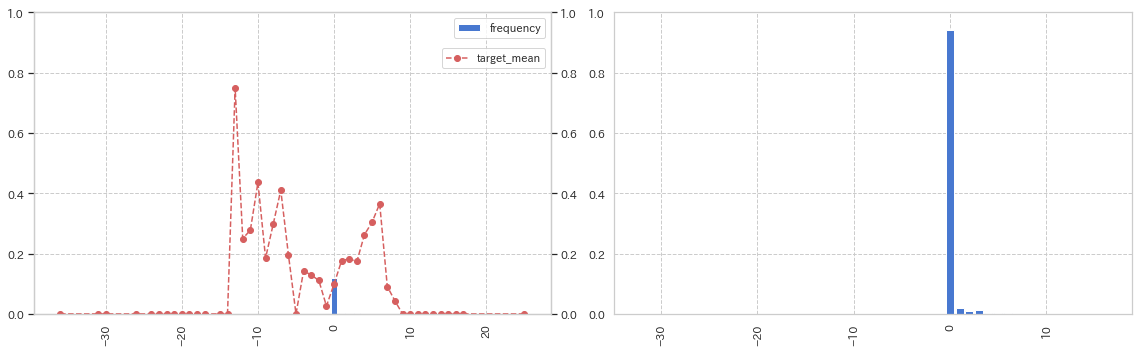

id_10


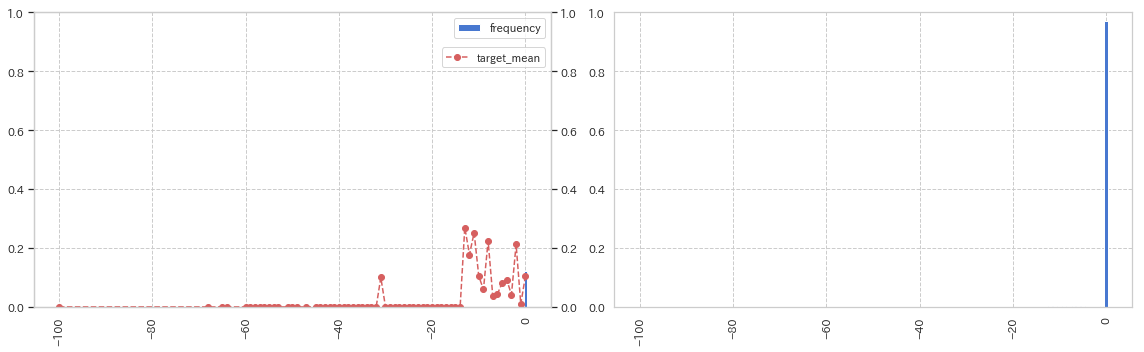

id_11


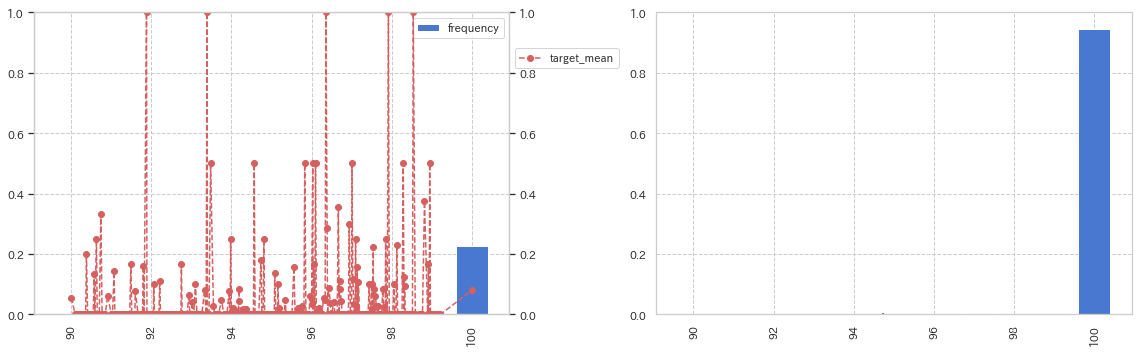

id_12


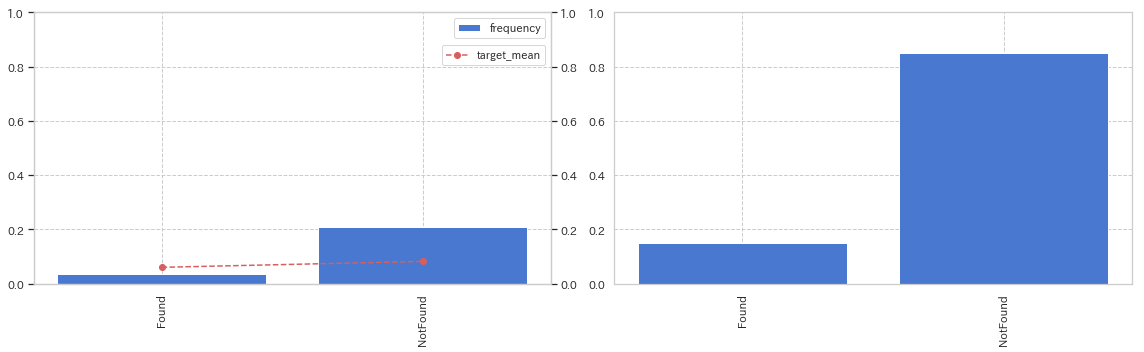

id_13


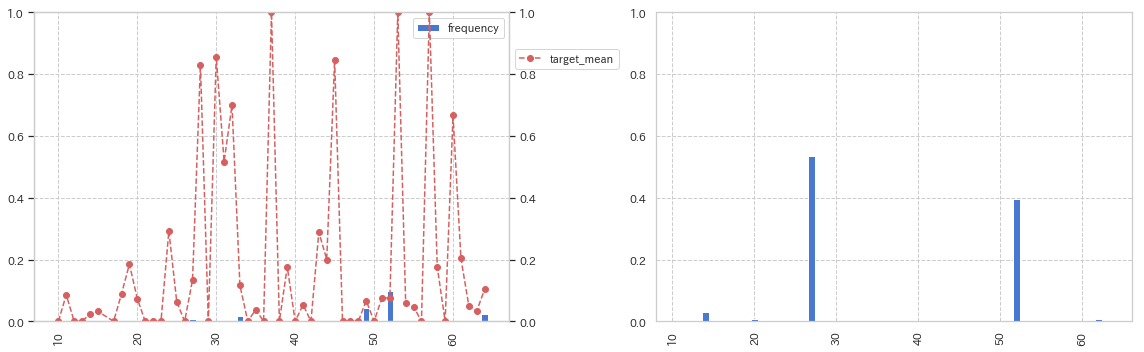

id_14


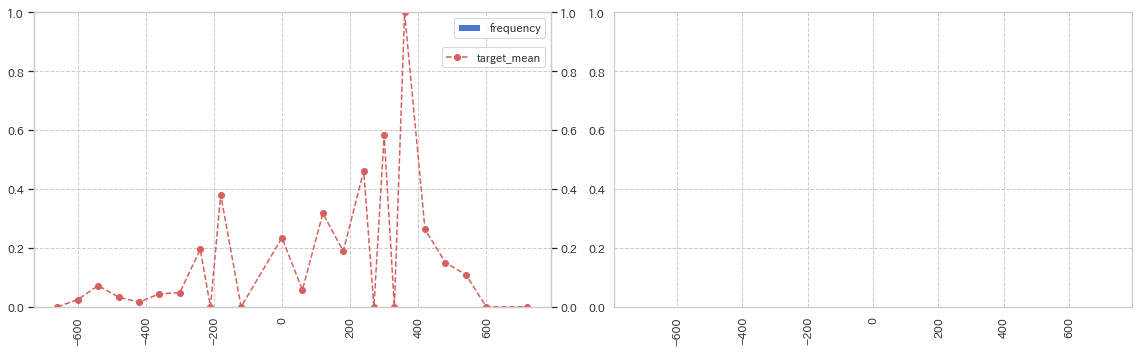

id_15


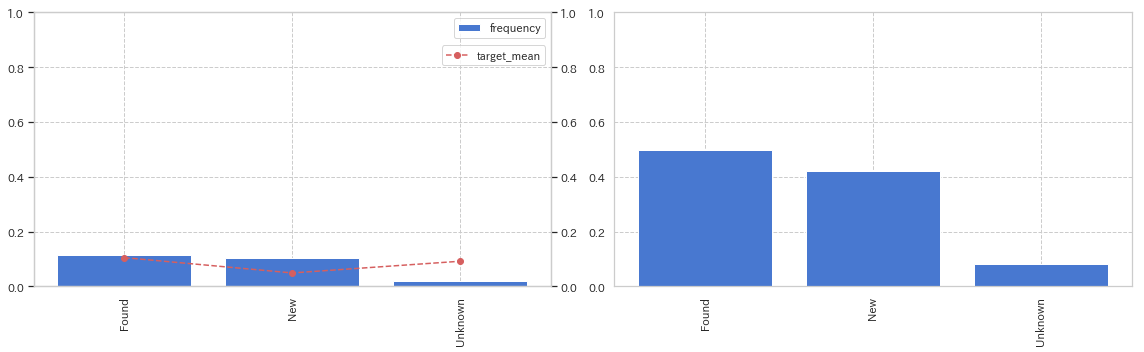

id_16


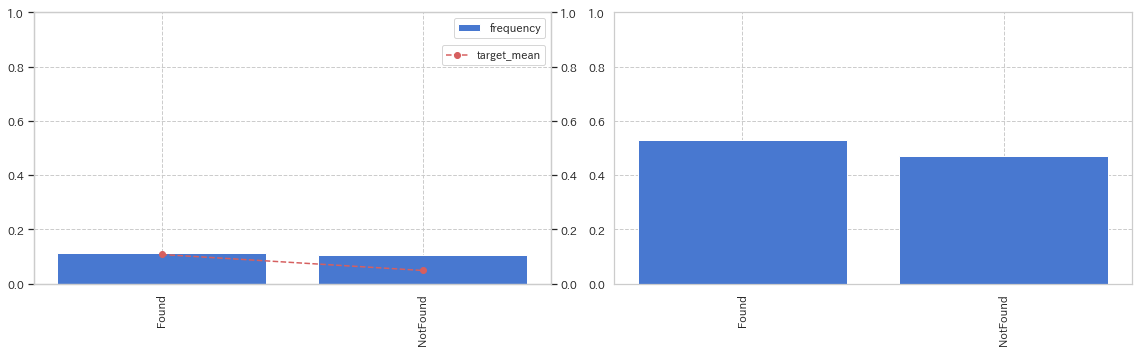

id_17


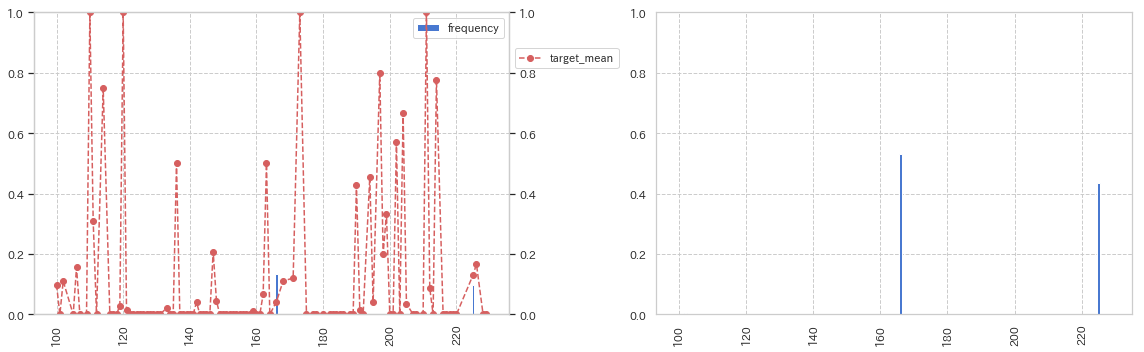

id_18


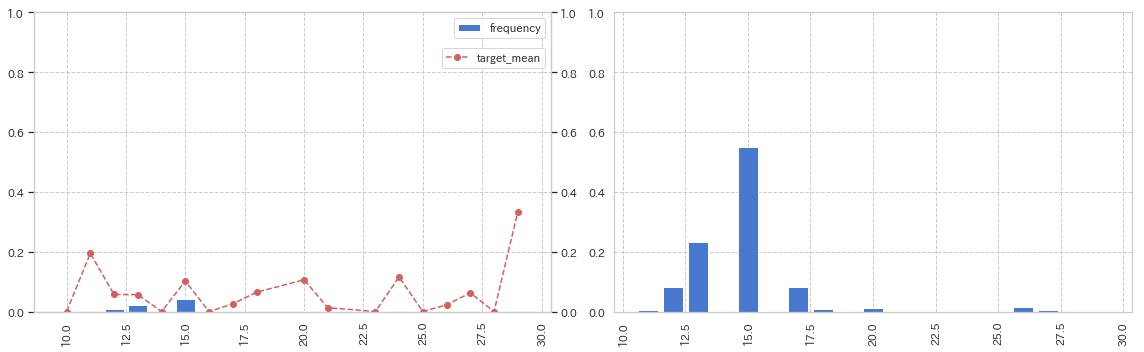

id_19


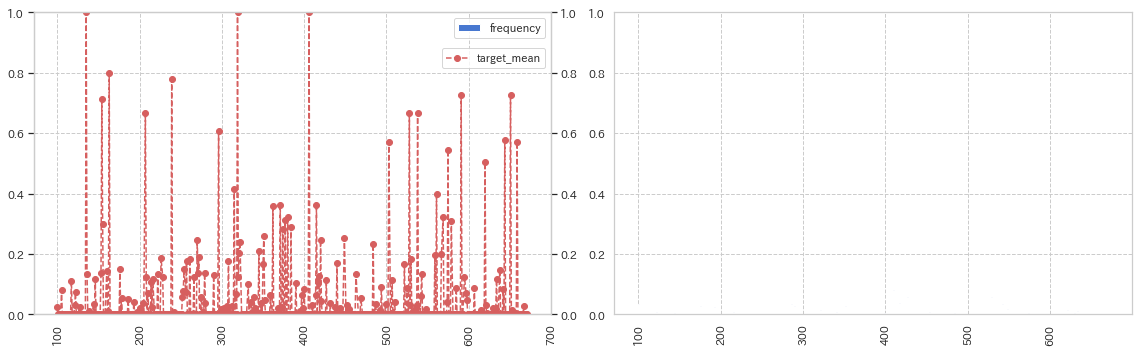

id_20


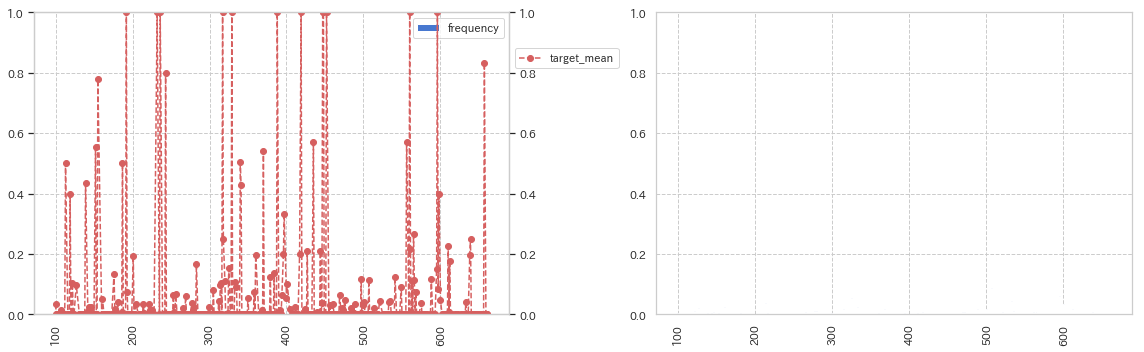

id_21


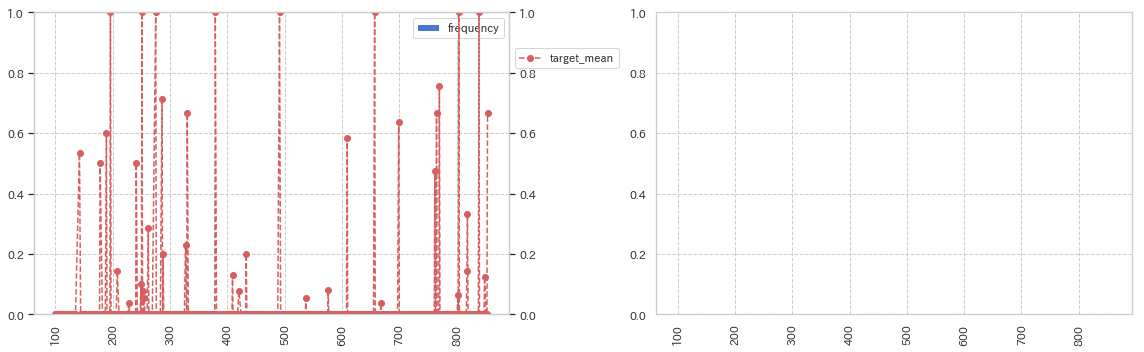

id_22


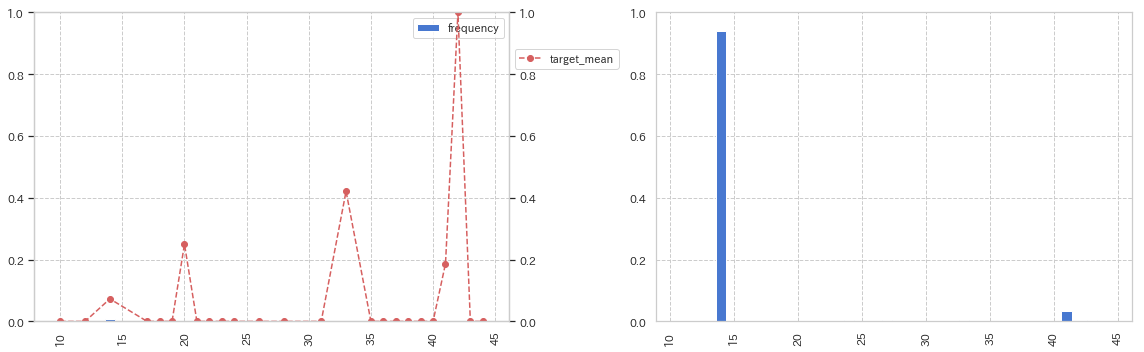

id_23


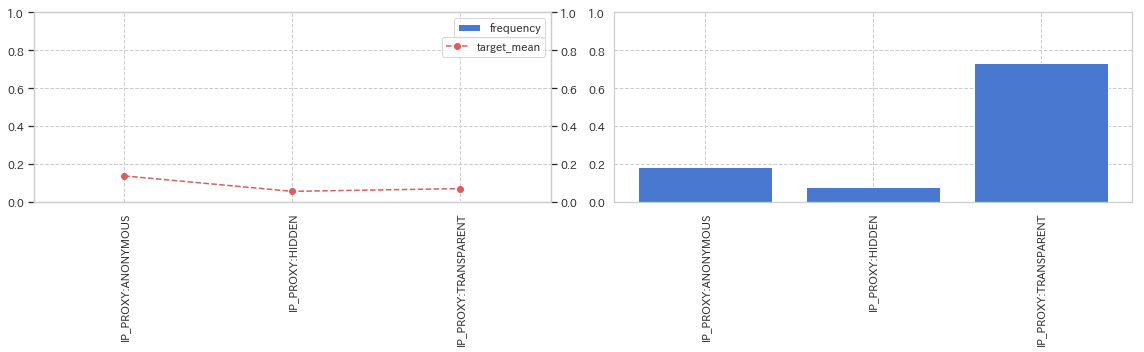

id_24


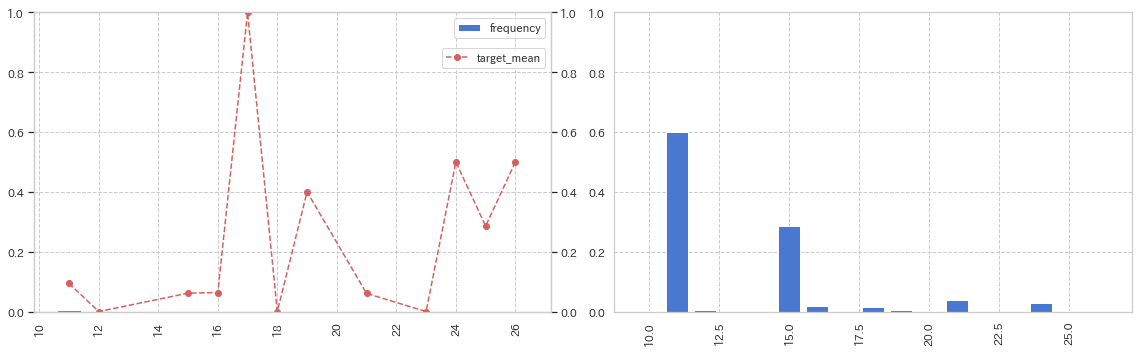

id_25


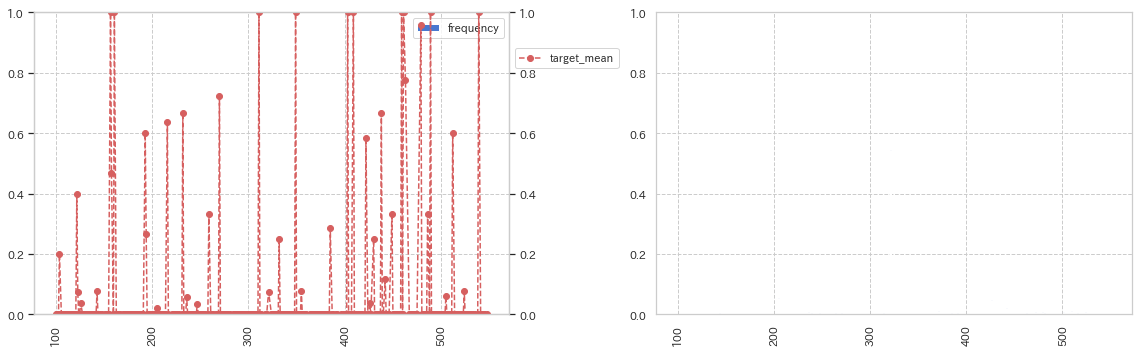

id_26


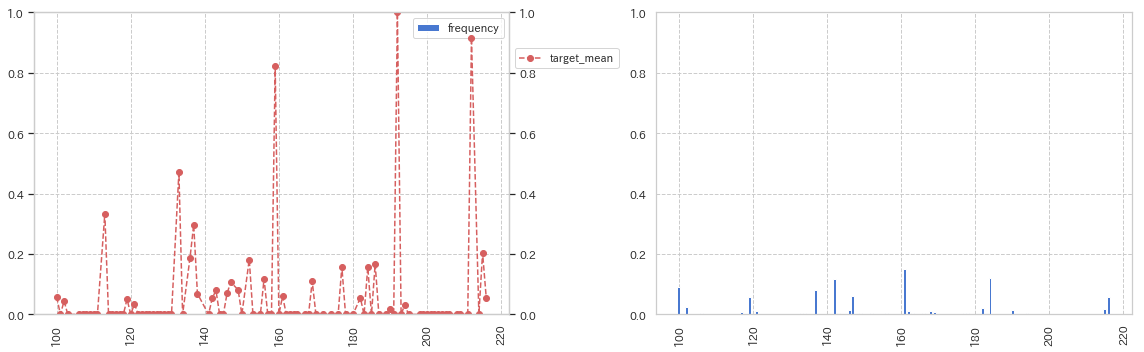

id_27


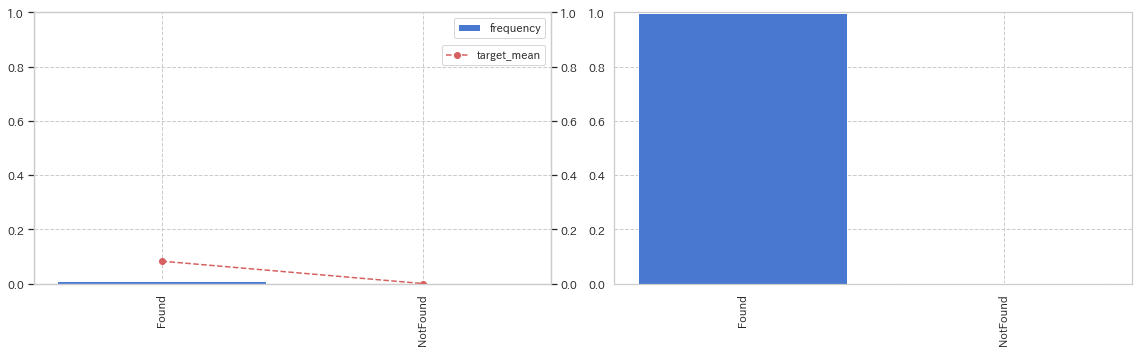

id_28


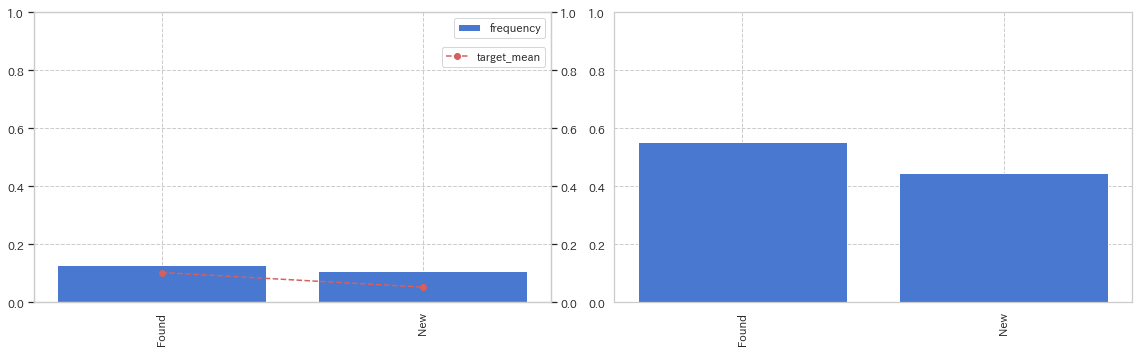

id_29


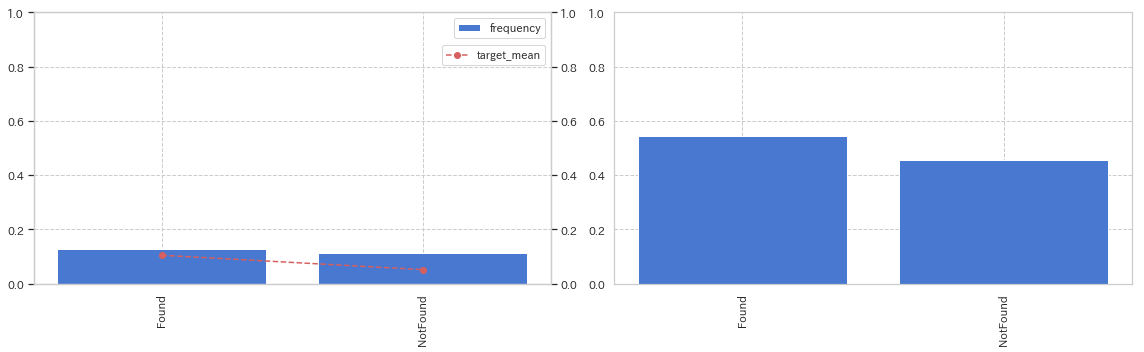

id_30


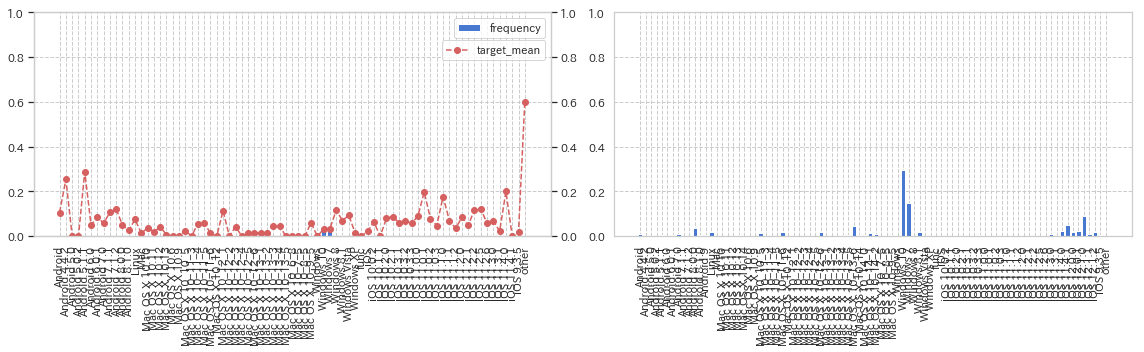

id_31


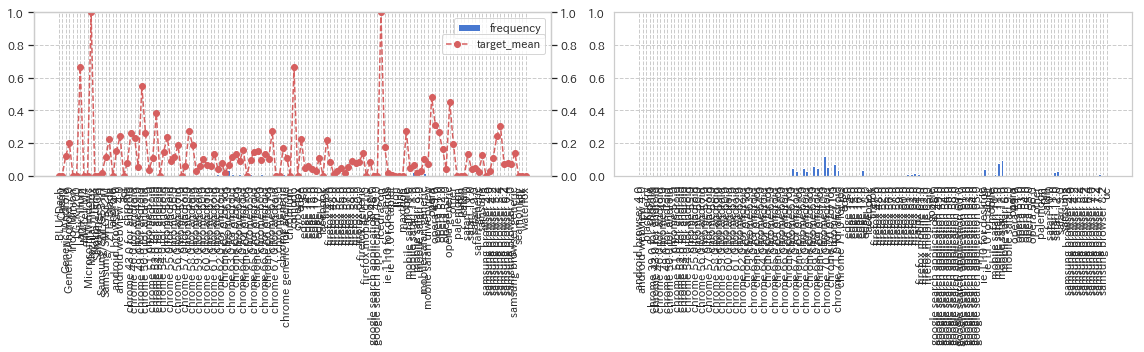

id_32


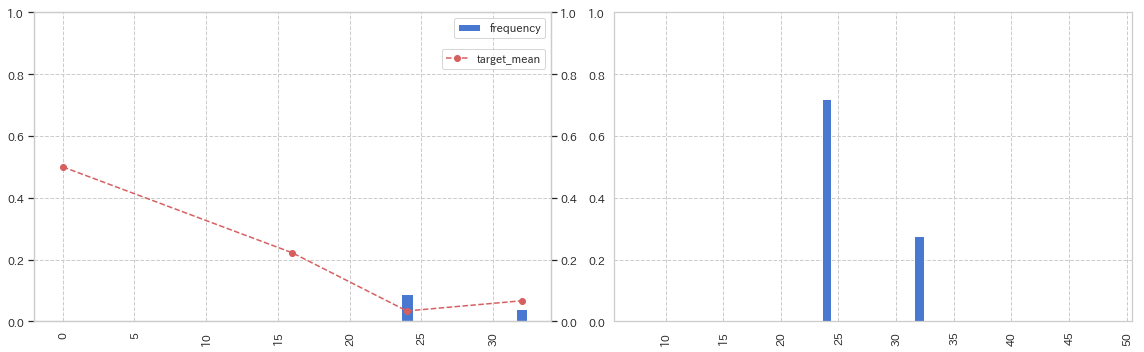

id_33


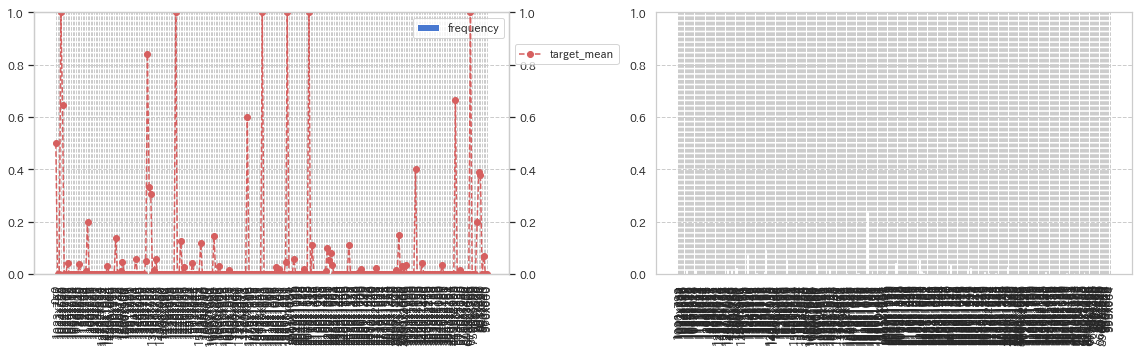

id_34


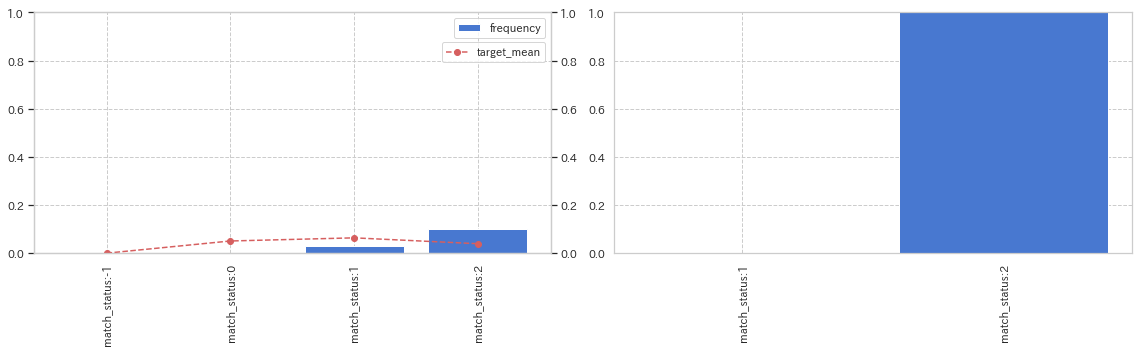

id_35


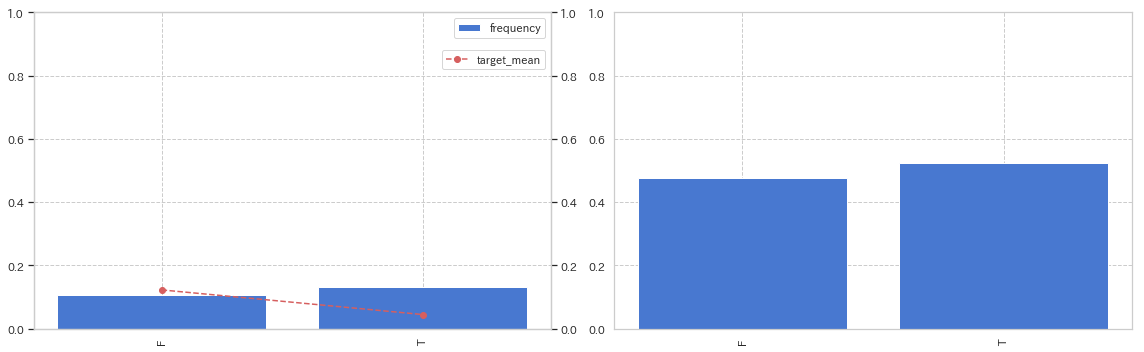

id_36


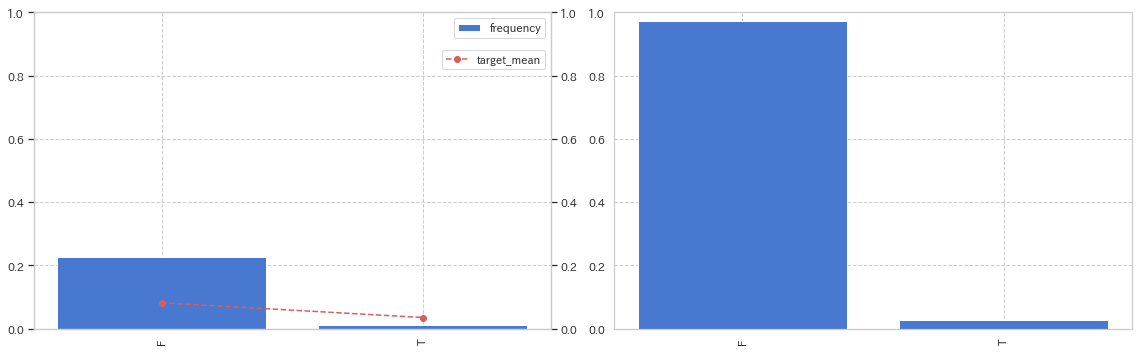

id_37


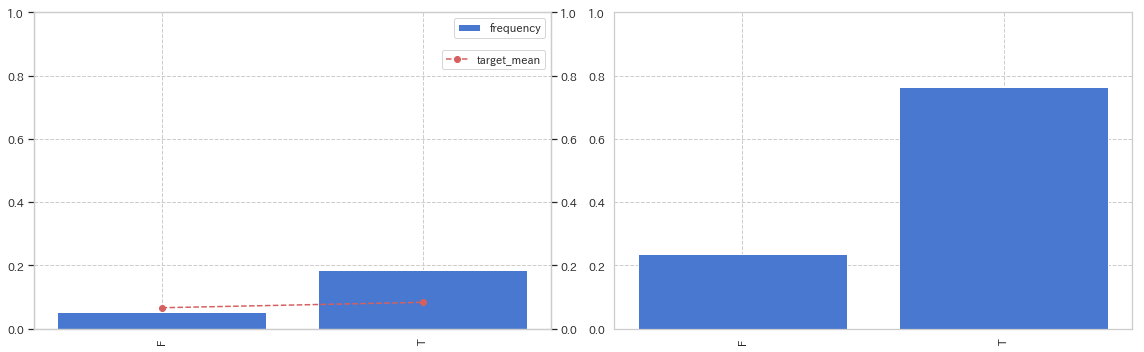

id_38


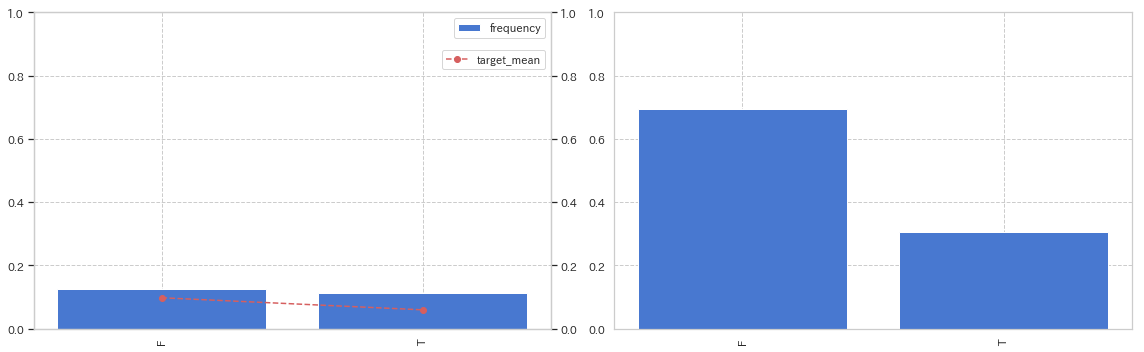

In [38]:
EDA.category_vs_target(
    train,
    test,
    categorical_features=[c for c in col if not c in 'id_02'],
    target_column='isFraud',
    rotation=90,
    fillna=False,
    figsize=(16, 5),
)

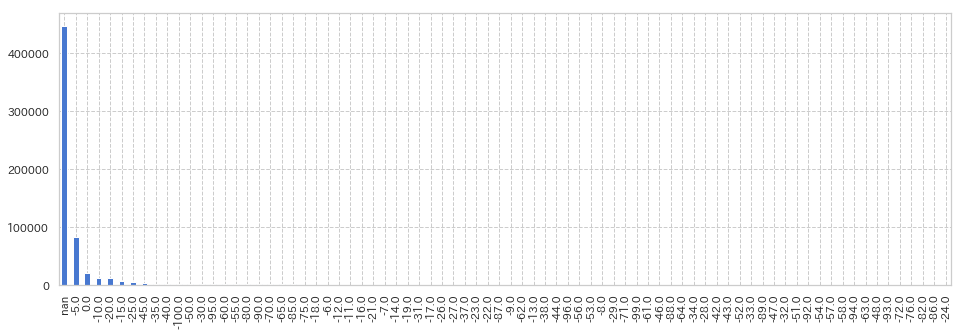

In [29]:
train['id_01'].value_counts(dropna=False).plot(kind='bar', figsize=(16, 5));

In [60]:
def dist_train_vs_target(train, columns, target):
    if isinstance(columns, str):
        columns = [columns]
        
    t0 = train[train[target] == 0]
    t1 = train[train[target] == 1]
    for c in columns:
        sns.distplot(t0[c].dropna(), color='lime')
        sns.distplot(t1[c].dropna(), color='gray')
    return

In [114]:
def kde_train_vs_target(train, columns, target):
    if isinstance(columns, str):
        columns = [columns]
        
    t0 = train[train[target] == 0]
    t1 = train[train[target] == 1]
    for c in columns:
        sns.kdeplot(t0[c], shade=True)
        sns.kdeplot(t1[c], shade=True)
        
    return

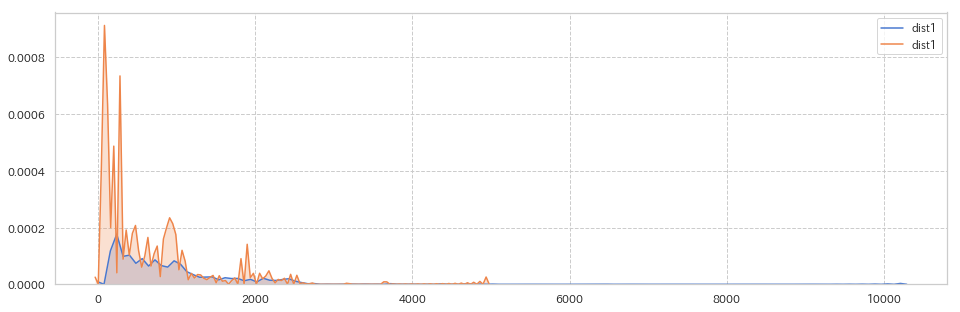

In [116]:
plt.figure(figsize=(16, 5))
kde_train_vs_target(train, ['dist1'], 'isFraud')

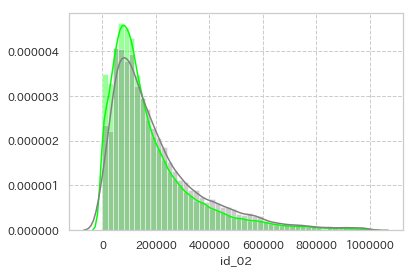

In [61]:
dist_train_vs_target(train, ['id_02'], 'isFraud')

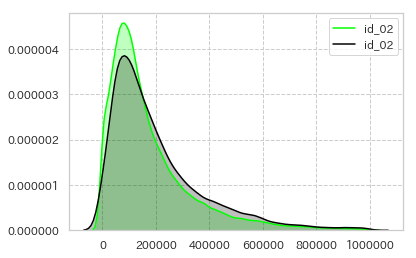

In [63]:
kde_train_vs_target(train, ['id_02'], 'isFraud')

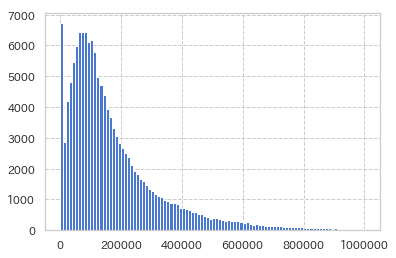

In [36]:
train['id_02'].hist(bins=100)

In [16]:
EDA.get_info(train[col])

Shape: (590540, 38)


,DataType,Nulls,Null%,Uniques,Unique%,Min,Mean,Max,Std,top10 val,top10 cnt,top10 raito
id_01,float32,446307,75.576083,77,0.013039,-100.0,-10.170502,0.0,14.342789,"[-5.0, 0.0, -10.0, -20.0, -15.0, -25.0, -45.0,...","[82170, 19555, 11257, 11211, 5674, 4623, 2143,...","[0.14, 0.03, 0.02, 0.02, 0.01, 0.01, 0.0, 0.0,..."
id_02,float32,449668,76.145223,115655,19.584617,1.0,174716.937500,999595.0,159650.000000,"[1102.0, 696.0, 1141.0, 1083.0, 1116.0, 1120.0...","[11, 10, 9, 9, 9, 9, 9, 8, 7, 7]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
id_03,float32,524216,88.768923,24,0.004064,-13.0,0.060189,10.0,0.598342,"[0.0, 1.0, 3.0, 2.0, 5.0, 4.0, 6.0, -5.0, -6.0...","[63903, 863, 668, 421, 109, 100, 64, 33, 31, 21]","[0.11, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
id_04,float32,524216,88.768923,15,0.002540,-28.0,-0.058938,0.0,0.701242,"[0.0, -5.0, -6.0, -8.0, -4.0, -1.0, -11.0, -12...","[65739, 132, 98, 64, 51, 43, 35, 34, 30, 26]","[0.11, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
id_05,float32,453675,76.823755,93,0.015748,-72.0,1.615585,52.0,5.247610,"[0.0, 1.0, 2.0, 3.0, 4.0, 6.0, 5.0, 7.0, 8.0, ...","[92743, 8293, 4937, 3854, 2941, 2338, 2312, 14...","[0.16, 0.01, 0.01, 0.01, 0.0, 0.0, 0.0, 0.0, 0..."
id_06,float32,453675,76.823755,101,0.017103,-100.0,-6.698710,0.0,16.482006,"[0.0, -1.0, -5.0, -6.0, -9.0, -100.0, -8.0, -1...","[91325, 4687, 3849, 3257, 2634, 2431, 1994, 19...","[0.15, 0.01, 0.01, 0.01, 0.0, 0.0, 0.0, 0.0, 0..."
id_07,float32,585385,99.127070,84,0.014224,-46.0,13.285354,61.0,11.384203,"[0.0, 16.0, 14.0, 12.0, 15.0, 17.0, 4.0, 13.0,...","[409, 245, 228, 208, 186, 180, 178, 175, 154, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
id_08,float32,585385,99.127070,94,0.015918,-100.0,-38.600388,0.0,26.084953,"[-100.0, 0.0, -34.0, -33.0, -32.0, -35.0, -25....","[500, 261, 257, 209, 185, 184, 126, 117, 116, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
id_09,float32,515614,87.312290,46,0.007789,-36.0,0.091023,25.0,0.983644,"[0.0, 1.0, 3.0, 2.0, 4.0, 5.0, 6.0, -6.0, -5.0...","[70378, 1616, 966, 773, 270, 207, 145, 66, 60,...","[0.12, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
id_10,float32,515614,87.312290,62,0.010499,-100.0,-0.301124,0.0,2.789352,"[0.0, -6.0, -5.0, -1.0, -8.0, -11.0, -9.0, -12...","[72879, 295, 247, 200, 147, 127, 118, 118, 115...","[0.12, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


addr1


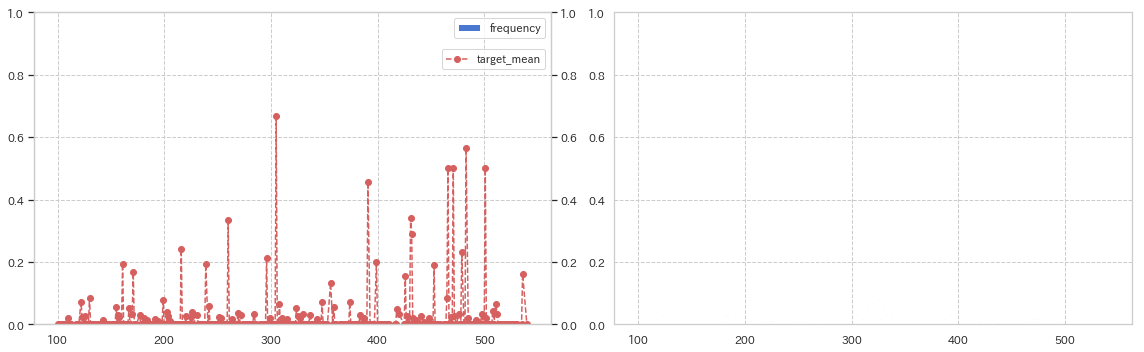

addr2


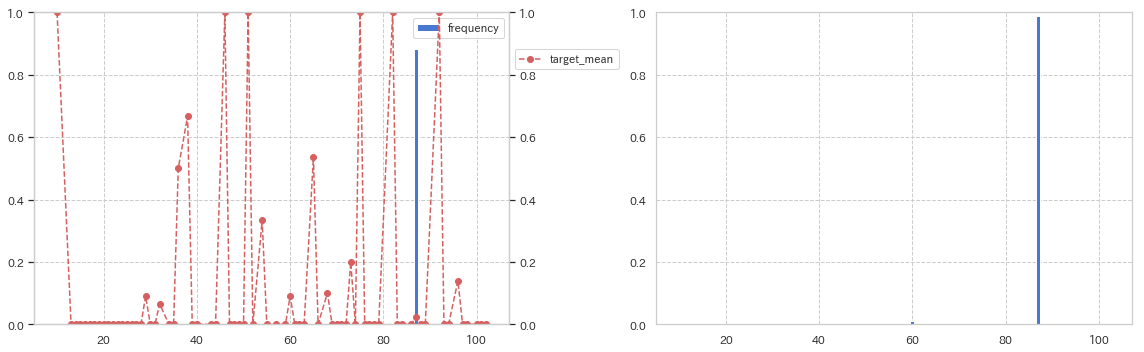

In [77]:
EDA.category_vs_target(
    train,
    test,
    categorical_features=['addr1', 'addr2'],
    target_column='isFraud',
    sort='alphabetic',
    rotation=0,
    fillna=False,
    figsize=(16, 5),
)

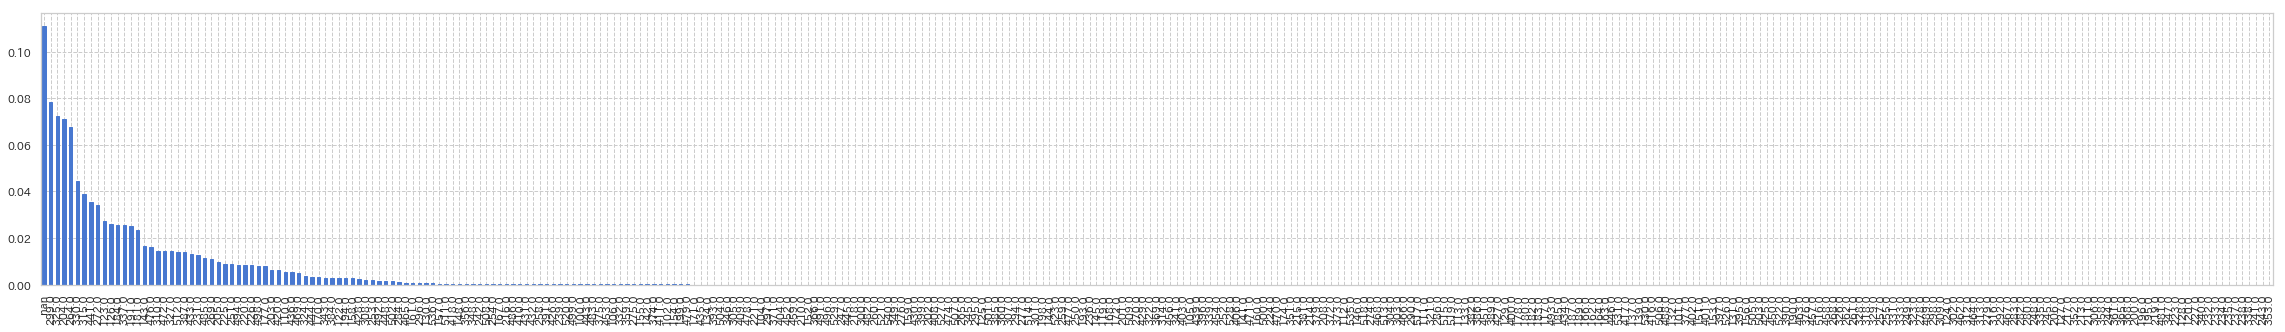

In [78]:
train['addr1'].value_counts(dropna=False, normalize=True).plot(kind='bar', figsize=(40, 5), edgecolor='b')

In [79]:
m_cols = [col for col in train.columns if 'M' in col]

In [82]:
EDA.get_info(train[m_cols])

Shape: (590540, 9)


,DataType,Nulls,Null%,Uniques,Unique%,Min,Mean,Max,Std,top10 val,top10 cnt,top10 raito
M1,object,271100,45.907136,2,0.000339,NaN,NaN,NaN,NaN,"['T', 'F']","[319415, 25]","[0.54, 0.0]"
M2,object,271100,45.907136,2,0.000339,NaN,NaN,NaN,NaN,"['T', 'F']","[285468, 33972]","[0.48, 0.06]"
M3,object,271100,45.907136,2,0.000339,NaN,NaN,NaN,NaN,"['T', 'F']","[251731, 67709]","[0.43, 0.11]"
M4,object,281444,47.658753,3,0.000508,NaN,NaN,NaN,NaN,"['M0', 'M2', 'M1']","[196405, 59865, 52826]","[0.33, 0.1, 0.09]"
M5,object,350482,59.349409,2,0.000339,NaN,NaN,NaN,NaN,"['F', 'T']","[132491, 107567]","[0.22, 0.18]"
M6,object,169360,28.678836,2,0.000339,NaN,NaN,NaN,NaN,"['F', 'T']","[227856, 193324]","[0.39, 0.33]"
M7,object,346265,58.635317,2,0.000339,NaN,NaN,NaN,NaN,"['F', 'T']","[211374, 32901]","[0.36, 0.06]"
M8,object,346252,58.633115,2,0.000339,NaN,NaN,NaN,NaN,"['F', 'T']","[155251, 89037]","[0.26, 0.15]"
M9,object,346252,58.633115,2,0.000339,NaN,NaN,NaN,NaN,"['T', 'F']","[205656, 38632]","[0.35, 0.07]"


In [117]:
df = feather.read_dataframe('../feature/f201__train__myCE.ftr')

In [118]:
df.head()

,f201__DeviceInfo_CE,f201__DeviceType_CE,f201__M1_CE,f201__M2_CE,f201__M3_CE,f201__M4_CE,f201__M5_CE,f201__M6_CE,f201__M7_CE,f201__M8_CE,...,f201__id_29_CE,f201__id_30_CE,f201__id_31_CE,f201__id_32_CE,f201__id_33_CE,f201__id_34_CE,f201__id_35_CE,f201__id_36_CE,f201__id_37_CE,f201__id_38_CE
0,863508.0,819490.0,649436.0,588323.0,518244.0,122947.0,240155.0,349499.0,581283.0,581256.0,...,819475.0,949007.0,820324.0,948974.0,953271.0,947251.0,819269.0,819269.0,819269.0,819269.0
1,863508.0,819490.0,447739.0,447739.0,447739.0,357789.0,196962.0,349499.0,581283.0,581256.0,...,819475.0,949007.0,820324.0,948974.0,953271.0,947251.0,819269.0,819269.0,819269.0,819269.0
2,863508.0,819490.0,649436.0,588323.0,518244.0,357789.0,240155.0,419433.0,444604.0,323650.0,...,819475.0,949007.0,820324.0,948974.0,953271.0,947251.0,819269.0,819269.0,819269.0,819269.0
3,863508.0,819490.0,447739.0,447739.0,447739.0,357789.0,196962.0,419433.0,581283.0,581256.0,...,819475.0,949007.0,820324.0,948974.0,953271.0,947251.0,819269.0,819269.0,819269.0,819269.0
4,9.0,118173.0,447739.0,447739.0,447739.0,519189.0,660114.0,328299.0,581283.0,581256.0,...,128492.0,3573.0,1067.0,44077.0,1430.0,132185.0,149464.0,267353.0,215149.0,108982.0


In [119]:
df.isnull().sum()

f201__DeviceInfo_CE       0
f201__DeviceType_CE       0
f201__M1_CE               0
f201__M2_CE               0
f201__M3_CE               0
f201__M4_CE               0
f201__M5_CE               0
f201__M6_CE               0
f201__M7_CE               0
f201__M8_CE               0
f201__M9_CE               0
f201__P_emaildomain_CE    0
f201__ProductCD_CE        0
f201__R_emaildomain_CE    0
f201__addr1_CE            0
f201__addr2_CE            0
f201__card4_CE            0
f201__card6_CE            0
f201__id_01_CE            0
f201__id_03_CE            0
f201__id_04_CE            0
f201__id_05_CE            0
f201__id_06_CE            0
f201__id_07_CE            0
f201__id_08_CE            0
f201__id_09_CE            0
f201__id_10_CE            0
f201__id_11_CE            0
f201__id_12_CE            0
f201__id_13_CE            0
f201__id_14_CE            0
f201__id_15_CE            0
f201__id_16_CE            0
f201__id_17_CE            0
f201__id_18_CE            0
f201__id_19_CE      

In [109]:
train['DeviceInfo'].head()

0                             None
1                             None
2                             None
3                             None
4    SAMSUNG SM-G892A Build/NRD90M
Name: DeviceInfo, dtype: object